## Load Data
读取原始数据

In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

data_train = pd.read_csv("train.csv")
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


让DataFrame筛选出一些信息

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


查看具体数值情况

In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


可视化

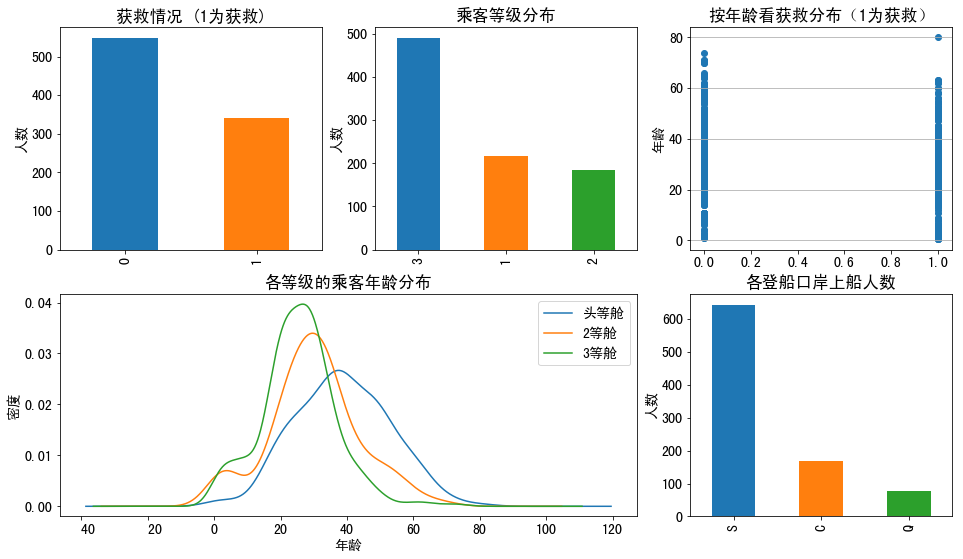

In [46]:
import matplotlib.pyplot as plt
figsize = 16,9
plt.rcParams['figure.figsize'] = figsize
plt.rc('font', family='SimHei', size=14)
fig = plt.figure()
fig.set(alpha=0.2) # 设定图表的alpha参数

plt.subplot2grid((2,3),(0,0))  # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar') # 柱状图
plt.title(u"获救情况 (1为获救)") # 标题
plt.ylabel(u"人数")  

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.title(u"乘客等级分布")
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel(u"年龄")
plt.grid(b=True, which='major', axis='y')
plt.title(u"按年龄看获救分布（1为获救）")
    
plt.subplot2grid((2,3),(1,0), colspan=2) 
data_train.Age[data_train.Pclass == 1].plot(kind='kde')  #概率分布图  
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()

属性与获救结果的关联统计

<Figure size 1152x648 with 0 Axes>

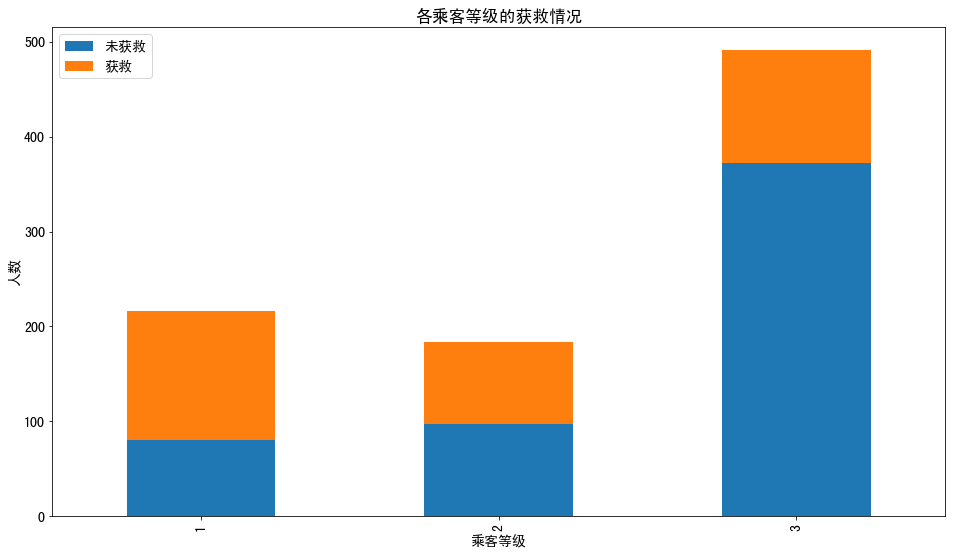

In [49]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True) #累积着的柱状图
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级")
plt.ylabel(u"人数")
plt.show()

查看各性别的获救情况

In [55]:
fig = plt.figure()
fig.set(alpha = 0.2)

Survived_m  = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
Survived_f
# df.plot(kind='bar', stacked=True)
# plt.title(u"按性别看获救情况")
# plt.xlabel(u"性别") 
# plt.ylabel(u"人数")
# plt.show()

1    233
0     81
Name: Survived, dtype: int64

<Figure size 1152x648 with 0 Axes>

歪果盆友果然很尊重lady，lady first践行得不错。性别无疑也要作为重要特征加入最后的模型之中。

再来个详细版的好了。

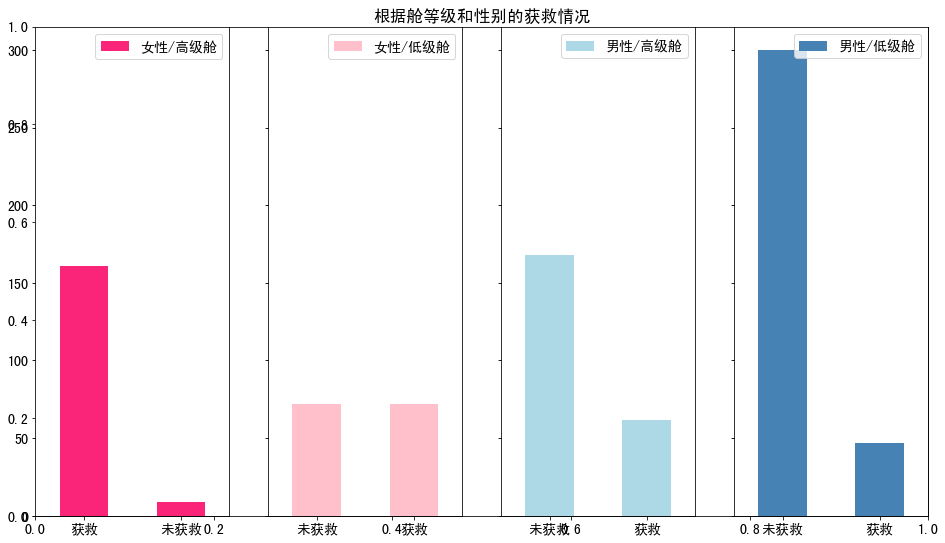

In [50]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

查看各登船港口的获救情况

<Figure size 432x288 with 0 Axes>

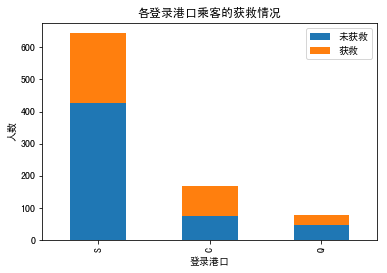

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

家庭情况跟获救与否的关系

In [9]:
g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

g = data_train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7


查看船舱的分布情况

In [10]:
data_train.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
F33                3
C22 C26            3
E101               3
F2                 3
D                  3
C65                2
B20                2
E33                2
D33                2
D35                2
D36                2
C125               2
C123               2
C93                2
E25                2
B57 B59 B63 B66    2
B22                2
C126               2
B5                 2
D26                2
E8                 2
B49                2
B18                2
C124               2
F4                 2
B58 B60            2
E44                2
                  ..
D48                1
B79                1
C110               1
B38                1
A24                1
C101               1
D21                1
C111               1
E10                1
F E69              1
C82                1
C70                1
C49                1
D11                1
D49                1
E49                1
E46          

有无Cabin信息这个粗粒度上看看Survived的情况

<Figure size 432x288 with 0 Axes>

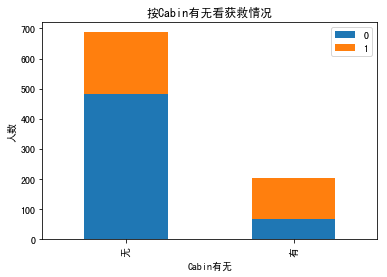

In [11]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

## 数据预处理

首先补全丢的数据 
使用scikit-learn中的Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df



data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

对类目型的特征因子化

In [13]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix= 'Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


成功的把所有类目的属性都转换成0、1的数值属性了

但是由于部分数据的数据幅度变化较大，因此需要进行scaling，缩放到[-1,1]之内，
这里使用scikit-learn中的preprocessing模块

'''
data2 = df['Age']
import sklearn.preprocessing as preprocessing
_mean = data2.mean()
_std = data2.std()
data2 = (data2 - _mean) / _std
data2
df['Age_scaled'] = data2
df = pd.concat([df,data2], axis=1)
df
#scaler = preprocessing.StandardScaler().fit(data2)
'''

In [14]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()

age_scale_param = scaler.fit(np.array(df.Age).reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(np.array(df.Age).reshape(-1,1), age_scale_param)

fare_scale_param = scaler.fit(np.array(df.Fare).reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(np.array(df.Fare).reshape(-1,1), fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337
5,6,0,23.838953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.426384,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787722,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029569,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194333,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148655,-0.042956


##  逻辑回归模型

把需要的feature字段取出来，转成numpy格式，使用sklearn中的LogisticRegression建模

In [15]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

##  开始预测

测试集的数据也要进行预处理

In [16]:
data_test = pd.read_csv("./test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X).reshape(-1,1)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges
data_test = set_Cabin_type(data_test)

dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(np.array(df_test.Age).reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(np.array(df_test.Fare).reshape(-1,1), fare_scale_param)
df_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248380,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.034018,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337609,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944790,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717097,-0.204154


###  预测结果

In [17]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("./logistic_regression_predictions.csv", index=False)

###  查看预测结果


In [18]:
prediction_1 = pd.read_csv("./logistic_regression_predictions.csv")
prediction_1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


##   模型优化

以上只是实现了一个基本模型，要想实现更好的预测效果，还有许多地方需要优化

### 按年龄分类
首先已年龄为例，按照常识，老人小孩应该会受到更多的照顾。

这样看的话，年龄作为一个连续值，给一个固定的系数，应该和年龄是一个正相关或者负相关。

所以，说不定把年龄离散化，按区段分作类别属性会更合适一些

这里先把得到的model系数和reature关联起来看看

In [19]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.34423560318135044],SibSp
1,[-0.10491580572014401],Parch
2,[0.0],Cabin_No
3,[0.9021091878031448],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.4172642471980603],Embarked_S
7,[1.956571223129606],Sex_female
8,[-0.677420658677175],Sex_male
9,[0.34115762964736196],Pclass_1


根据理论分析，这些系数为正的feature和最后的结果是一个正相关，反之为负相关

我们先看看那些权重绝对值非常大的feature，在我们的模型上：

* Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
* Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
* 有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)
* Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）
* 有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。
* 船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)

**观察完了，我们现在有一些想法了，但是怎么样才知道，哪些优化的方法是promising的呢？**

##  交叉验证

我们通常情况下，这么做cross validation：把train.csv分成两部分，一部分用于训练我们需要的模型，另外一部分数据上看我们预测算法的效果。

我们用scikit-learn的cross_validation来帮我们完成小数据集上的这个工作。

先简单看看cross validation情况下的打分

In [20]:
from sklearn import cross_validation

# 简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age|Sibsp|Parch|Fare_.*|Carbin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = np.array(all_data.values[:,1:])
y = np.array(all_data.values[:,0]).reshape(-1,1).astype(int)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
y = y.iloc[:,0].map(int)
print(cross_validation.cross_val_score(clf, X, y, cv=5))


[0.76536313 0.81005587 0.78089888 0.78089888 0.8079096 ]


/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


上面的结果看上去比之前的好

接下来观察一下交叉验证里面的bad case，看看能否发现什么蛛丝马迹

是我们忽略了哪些信息，使得这些乘客被判定错了，再把bad case上得到的想法和之前的系数分析结合起来，然后逐个分析

###  数据分割

在原始数据上看一看bad case

In [21]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:,1:], train_df.values[:,0])

# 对cross validation数据进行预测
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

origin_data_train = pd.read_csv("./train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


根据bad cases的结果，会有一些猜测和想法。其中会有一部分可能会印证在系数分析部分的猜测，那这些优化的想法优先级可以放高一些。

现在有了”train_df” 和 “vc_df” 两个数据部分，前者用于训练model，后者用于评定和选择模型。可以开始可劲折腾了。

我们随便列一些可能可以做的优化操作：

* Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
* Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
* Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
* Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
* 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
* 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
* 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
* 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
* Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。

大家接着往下挖掘，可能还可以想到更多可以细挖的部分。我这里先列这些了，然后我们可以使用手头上的”train_df”和”cv_df”开始试验这些feature engineering的tricks是否有效了。

试验的过程比较漫长，也需要有耐心，而且我们经常会面临很尴尬的状况，就是我们灵光一闪，想到一个feature，然后坚信它一定有效，结果试验下来，效果还不如试验之前的结果。恩，需要坚持和耐心，以及不断的挖掘。

我最好的结果是在『Survived~C(Pclass)+C(Title)+C(Sex)+C(Age_bucket)+C(Cabin_num_bucket)Mother+Fare+Family_Size』下取得的


##  <font color =red>此处有大量工作要做</font>

##  学习曲线 learning curves

有一个很可能发生的问题是，我们不断地做feature engineering，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合得越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生**过拟合**问题。

从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，也有可能是欠拟合问题，也就是说在训练集上，其实拟合的也不是那么好。

额，这个欠拟合和过拟合怎么解释呢。这么说吧：

* 过拟合就像是你班那个学数学比较刻板的同学，老师讲过的题目，一字不漏全记下来了，于是老师再出一样的题目，分分钟精确出结果。but数学考试，因为总是碰到新题目，所以成绩不咋地。
* 欠拟合就像是，咳咳，和博主level差不多的差生。连老师讲的练习题也记不住，于是连老师出一样题目复习的周测都做不好，考试更是可想而知了。

而在机器学习的问题上，对于过拟合和欠拟合两种情形。我们优化的方式是不同的。

对过拟合而言，通常以下策略对结果优化是有用的：

* 做一下feature selection，挑出较好的feature的subset来做training
* 提供更多的数据，从而弥补原始数据的bias问题，学习到的model也会更准确

而对于欠拟合而言，我们通常需要更多的feature，更复杂的模型来提高准确度。

著名的learning curve可以帮我们判定我们的模型现在所处的状态。我们以样本数为横坐标，训练和交叉验证集上的错误率作为纵坐标，两种状态分别如下两张图所示：过拟合(overfitting/high variace)，欠拟合(underfitting/high bias)

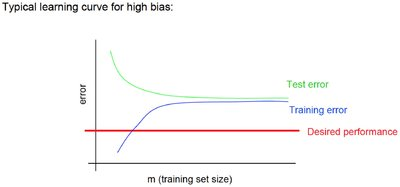

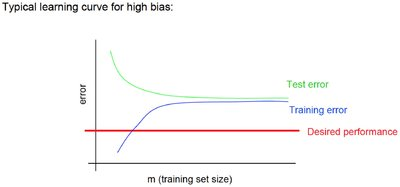

我们也可以把错误率替换成准确率(得分)，得到另一种形式的learning curve(sklearn 里面是这么做的)。

回到我们的问题，我们用scikit-learn里面的learning_curve来帮我们分辨我们模型的状态。举个例子，这里我们一起画一下我们最先得到的baseline model的learning curve。

/usr/local/lib/python3.5/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


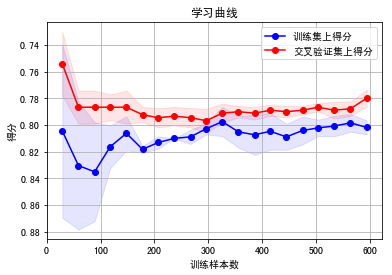

(0.7903927918059794, 0.03343845510352439)

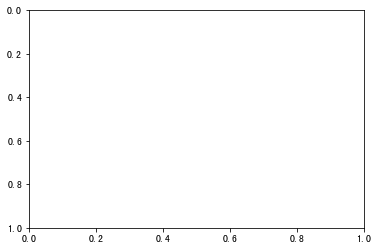

In [22]:
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", X, y)

在实际数据上看，我们得到的learning curve没有理论推导的那么光滑哈，但是可以大致看出来，训练集和交叉验证集上的得分曲线走势还是符合预期的。

目前的曲线看来，我们的model并不处于overfitting的状态(overfitting的表现一般是训练集上得分高，而交叉验证集上要低很多，中间的gap比较大)。因此我们可以再做些feature engineering的工作，添加一些新产出的特征或者组合特征到模型中。

## 模型融合 model ensemble

啥叫模型融合呢，我们还是举几个例子直观理解一下好了。

大家都看过知识问答的综艺节目中，求助现场观众时候，让观众投票，最高的答案作为自己的答案的形式吧，每个人都有一个判定结果，最后我们相信答案在大多数人手里。

再通俗一点举个例子。你和你班某数学大神关系好，每次作业都『模仿』他的，于是绝大多数情况下，他做对了，你也对了。突然某一天大神脑子犯糊涂，手一抖，写错了一个数，于是…恩，你也只能跟着错了。 
我们再来看看另外一个场景，你和你班5个数学大神关系都很好，每次都把他们作业拿过来，对比一下，再『自己做』，那你想想，如果哪天某大神犯糊涂了，写错了，but另外四个写对了啊，那你肯定相信另外4人的是正确答案吧？

最简单的模型融合大概就是这么个意思，比如分类问题，当我们手头上有一堆在同一份数据集上训练得到的分类器(比如logistic regression，SVM，KNN，random forest，神经网络)，那我们让他们都分别去做判定，然后对结果做投票统计，取票数最多的结果为最后结果。

bingo，问题就这么完美的解决了。

模型融合可以比较好地缓解，训练过程中产生的过拟合问题，从而对于结果的准确度提升有一定的帮助。

话说回来，回到我们现在的问题。你看，我们现在只讲了logistic regression，如果我们还想用这个融合思想去提高我们的结果，我们该怎么做呢？

既然这个时候模型没得选，那咱们就在数据上动动手脚咯。大家想想，如果模型出现过拟合现在，一定是在我们的训练上出现拟合过度造成的对吧。

那我们干脆就不要用全部的训练集，每次取训练集的一个subset，做训练，这样，我们虽然用的是同一个机器学习算法，但是得到的模型却是不一样的；同时，因为我们没有任何一份子数据集是全的，因此即使出现过拟合，也是在子训练集上出现过拟合，而不是全体数据上，这样做一个融合，可能对最后的结果有一定的帮助。对，这就是常用的Bagging。

我们用scikit-learn里面的Bagging来完成上面的思路，过程非常简单。代码如下：

In [23]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("./logistic_regression_bagging_predictions.csv", index=False)

现在再提交

## 总结

１．　对于任何的机器学习问题，不要一上来就追求尽善尽美，先用自己会的算法撸一个baseline的model出来，再进行后续的分析步骤，一步步提高。

２．　**对数据的认识很重要**

３．　**数据中的特殊点/离群点的分析和处理很重要**

４．　**特征工程(Feature Engineering)很重要**

５．　**模型融合(Model Ensemble)很重要**

本文中用机器学习解决问题的过程大致如下图所示


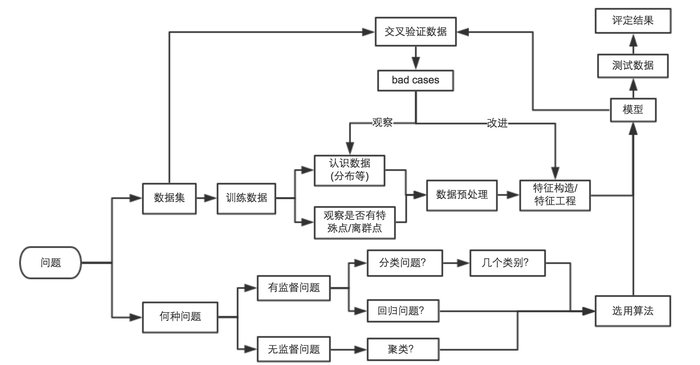